In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
X = df.drop('price',axis=1)
y= df['price']


In [9]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [10]:
for col in categorical_cols:
    print(col," : ", df[col].unique())

mainroad  :  ['yes' 'no']
guestroom  :  ['no' 'yes']
basement  :  ['no' 'yes']
hotwaterheating  :  ['no' 'yes']
airconditioning  :  ['yes' 'no']
prefarea  :  ['yes' 'no']
furnishingstatus  :  ['furnished' 'semi-furnished' 'unfurnished']


In [13]:
encoder = ColumnTransformer(
    transformers= [('encoder',OneHotEncoder(),categorical_cols)],
    remainder= 'passthrough'
)

In [29]:
X_encoded = encoder.fit_transform(X)
new_column_names = encoder.get_feature_names_out()
new_column_names

array(['encoder__mainroad_no', 'encoder__mainroad_yes',
       'encoder__guestroom_no', 'encoder__guestroom_yes',
       'encoder__basement_no', 'encoder__basement_yes',
       'encoder__hotwaterheating_no', 'encoder__hotwaterheating_yes',
       'encoder__airconditioning_no', 'encoder__airconditioning_yes',
       'encoder__prefarea_no', 'encoder__prefarea_yes',
       'encoder__furnishingstatus_furnished',
       'encoder__furnishingstatus_semi-furnished',
       'encoder__furnishingstatus_unfurnished', 'remainder__area',
       'remainder__bedrooms', 'remainder__bathrooms',
       'remainder__stories', 'remainder__parking'], dtype=object)

In [22]:
corr_matrix = np.corrcoef(X_encoded, rowvar=False)

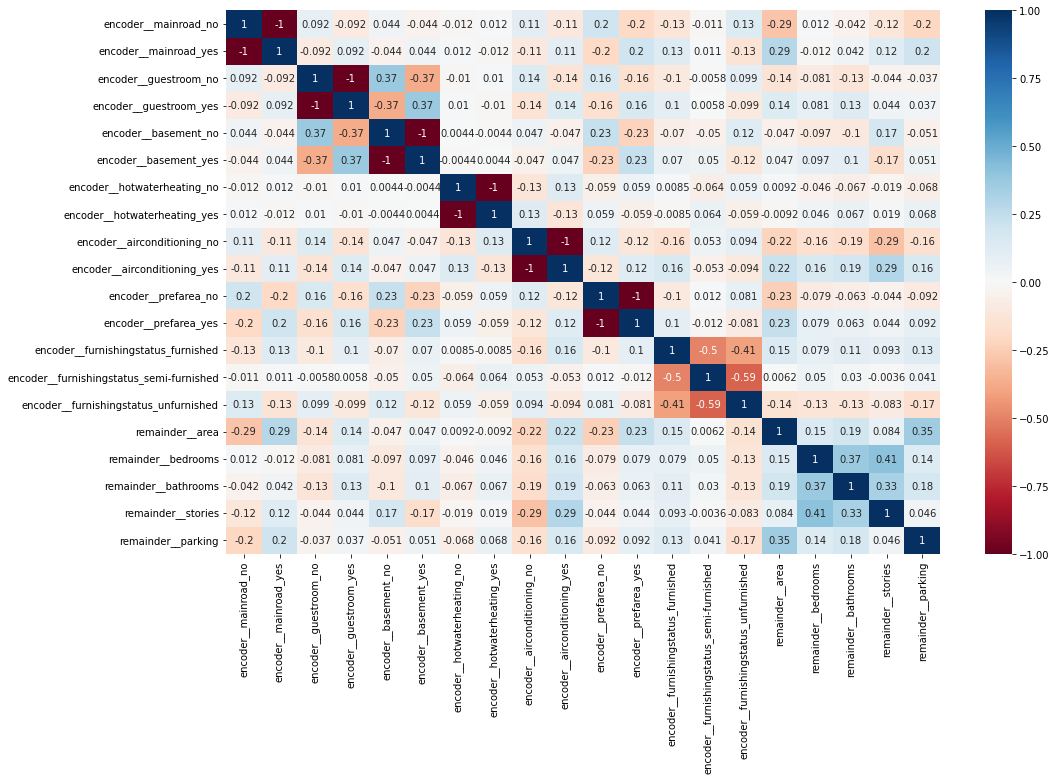

In [30]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot=True, cmap='RdBu',xticklabels=new_column_names,yticklabels=new_column_names)
plt.show()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,train_size = 0.7,random_state=51)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
model.score(X_test,y_test)

0.674046473733692

In [34]:
model.coef_

array([-2.35776136e+05,  2.35776136e+05, -1.85271618e+05,  1.85271618e+05,
       -1.73276574e+05,  1.73276574e+05, -5.88137758e+05,  5.88137758e+05,
       -4.42407826e+05,  4.42407826e+05, -3.34814775e+05,  3.34814775e+05,
        2.23724218e+05,  7.90184479e+04, -3.02742666e+05,  1.96303097e+02,
        1.07679992e+05,  9.67500626e+05,  4.65012182e+05,  3.17176209e+05])

In [35]:
model.intercept_

2058897.9131771964

In [36]:
custom_data = pd.DataFrame({
    'area': [8000],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['yes'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['no'],
    'furnishingstatus': ['semi-furnished']
})


In [40]:
custom_encoded = encoder.transform(custom_data)
custom_prediction = model.predict(custom_encoded)
custom_prediction

array([7273995.53627018])